In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#зчитування з файлу
data = pd.read_csv('2017_jun_final.csv')

In [2]:
# Использование метода head() для просмотра первых пяти строк таблицы
print(data.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

In [3]:
# Использование метода shape для определения размера таблицы
print(data.shape)

(8704, 25)


In [4]:
# Использование метода dtypes для определения типов столбцов
print(data.dtypes)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [5]:
# Использование методов isnull и sum для подсчета пропущенных значений в каждом столбце
missing_values_count = data.isnull().sum()

# Вычисление доли пропущенных значений в каждом столбце
missing_values_fraction = missing_values_count / len(data)

# Вывод результата на экран
print(missing_values_fraction)

N                                   0.000000
Должность                           0.000000
Язык.программирования               0.442325
Специализация                       0.829389
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Университет                         0.041131
Еще.студент                         0.000000
Уровень.английского                 0.000000
Предметная.область                  0.025620
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [6]:
# Список столбцов для сохранения, включая столбец "Мова програмування"
keep_columns = ['Язык.программирования'] + list(data.dropna(axis=1, how='any').columns)

# Оставляем только столбец "Мова програмування" и столбцы без пропущенных значений
clean_data = data[keep_columns]

# Выводим результат на экран
print(clean_data.head())

  Язык.программирования  N                 Должность Общий.опыт.работы  \
0                   NaN  1        Junior QA engineer               0.5   
1                   NaN  2        Junior QA engineer  меньше 3 месяцев   
2               C#/.NET  3         Software Engineer                 4   
3            JavaScript  4         Software Engineer                 5   
4            JavaScript  5  Senior Software Engineer    10 и более лет   

  Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0                          0.5               400   
1             меньше 3 месяцев               430   
2                            1              2500   
3                            4              2000   
4                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  \
0                                 0  Харьков       до 10 человек   
1                               130  Харьков  свыше 1000 человек   
2                               800   

In [7]:
# Рассчитываем долю пропусков для каждого столбца
null_fractions = clean_data.isnull().mean()

# Выводим результат на экран
print(null_fractions)

Язык.программирования               0.442325
N                                   0.000000
Должность                           0.000000
Общий.опыт.работы                   0.000000
Опыт.работы.на.текущем.месте        0.000000
Зарплата.в.месяц                    0.000000
Изменение.зарплаты.за.12.месяцев    0.000000
Город                               0.000000
Размер.компании                     0.000000
Тип.компании                        0.000000
Пол                                 0.000000
Возраст                             0.000000
Образование                         0.000000
Еще.студент                         0.000000
Уровень.английского                 0.000000
Дата.заполнения                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64


In [8]:
# Удаляем все строки с пропущенными значениями
clean_data = clean_data.dropna()
print(clean_data)

     Язык.программирования     N                 Должность Общий.опыт.работы  \
2                  C#/.NET     3         Software Engineer                 4   
3               JavaScript     4         Software Engineer                 5   
4               JavaScript     5  Senior Software Engineer    10 и более лет   
6                  C#/.NET     7  Junior Software Engineer                 1   
7                      C++     8  Senior Software Engineer                 6   
...                    ...   ...                       ...               ...   
8692                  Java  8693         Software Engineer                 5   
8694               C#/.NET  8695  Junior Software Engineer                 1   
8695                Python  8696         Software Engineer                 1   
8701            Ruby/Rails  8702  Junior Software Engineer                 1   
8703                  Java  8704  Senior Software Engineer                 7   

     Опыт.работы.на.текущем.месте  Зарп

In [9]:
# Выводим размерность очищенной таблицы на экран
print("Размерность очищенной таблицы: ", clean_data.shape)

Размерность очищенной таблицы:  (4854, 20)


In [10]:
# Создаем новую таблицу python_data, в которую попадут только те строки, где указан язык программирования Python
python_data = clean_data[clean_data['Язык.программирования'] == 'Python']
# Выводим размерность новой таблицы на экран
print("Размерность таблицы python_data: ", python_data.shape)

Размерность таблицы python_data:  (207, 20)


In [11]:
# Группируем данные по столбцу "Посада"
grouped_data = python_data.groupby('Должность')

# Выводим количество строк в каждой группе на экран
print(grouped_data.size())

Должность
Junior Software Engineer     63
Senior Software Engineer     31
Software Engineer           100
System Architect              2
Technical Lead               11
dtype: int64


In [12]:
# Группируем данные по столбцу "Посада" и находим минимальное и максимальное значение в столбце "Зарплата.в.місяць"
aggregated_data = python_data.groupby('Должность').agg({'Зарплата.в.месяц': ['min', 'max']})

# Выводим полученные результаты на экран
print(aggregated_data)


                         Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200


In [13]:
def fill_avg_salary(row):
    salary_columns = [col for col in row.index if col.startswith('Зарплата.')]
    return row[salary_columns].mean()

# Створюємо копію DataFrame для уникнення помилки A value is trying to be set on a copy of a slice from a DataFrame; A value is trying to be set on a copy of a slice from a DataFrame
python_data_copy = python_data.copy()

# Використовуємо .loc для створення нового стовпчика
python_data_copy.loc[:, 'avg'] = python_data_copy.apply(fill_avg_salary, axis=1)

# Виводимо на екран перші 5 рядків з DataFrame
print(python_data_copy.head())


    Язык.программирования    N                 Должность Общий.опыт.работы  \
12                 Python   13         Software Engineer                 1   
68                 Python   69         Software Engineer               1.5   
87                 Python   88  Junior Software Engineer               0.5   
114                Python  115  Junior Software Engineer               1.5   
143                Python  144  Junior Software Engineer                 1   

    Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
12              меньше 3 месяцев               800   
68                           0.5               900   
87                           0.5               600   
114                          0.5               685   
143                            1               750   

     Изменение.зарплаты.за.12.месяцев Город  Размер.компании    Тип.компании  \
12                                200  Киев    до 50 человек  Аутсорсинговая   
68                                900  Киев   

In [17]:
# Описова статистика за допомогою методу describe для нового стовпчика
print(python_data_copy['avg'].describe())


count     207.000000
mean     1753.937198
std      1314.751537
min       100.000000
25%       750.000000
50%      1425.000000
75%      2500.000000
max      9200.000000
Name: avg, dtype: float64


In [18]:
# Збереження таблиці у CSV файл
python_data.to_csv('2023_2017_jun_final.csv', index=False)


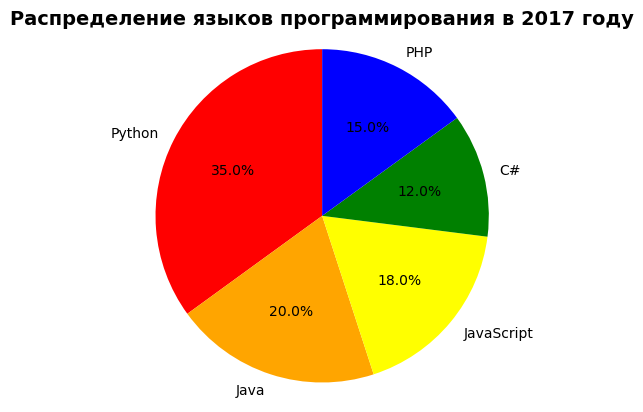

In [19]:
# Создание данных для графика
labels = ['Python', 'Java', 'JavaScript', 'C#', 'PHP']
values = [35, 20, 18, 12, 15]

# Оформление графика
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title('Распределение языков программирования в 2017 году', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

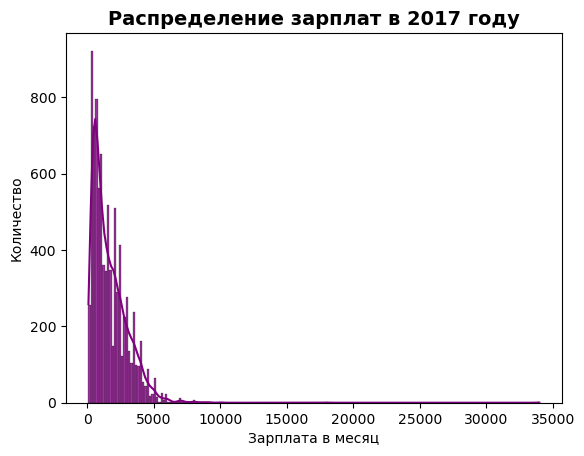

In [20]:
salary = data['Зарплата.в.месяц']

# Оформление графика
sns.histplot(data=salary, kde=True, color='purple', alpha=0.8)
plt.xlabel('Зарплата в месяц')
plt.ylabel('Количество')
plt.title('Распределение зарплат в 2017 году', fontsize=14, fontweight='bold')
plt.show()

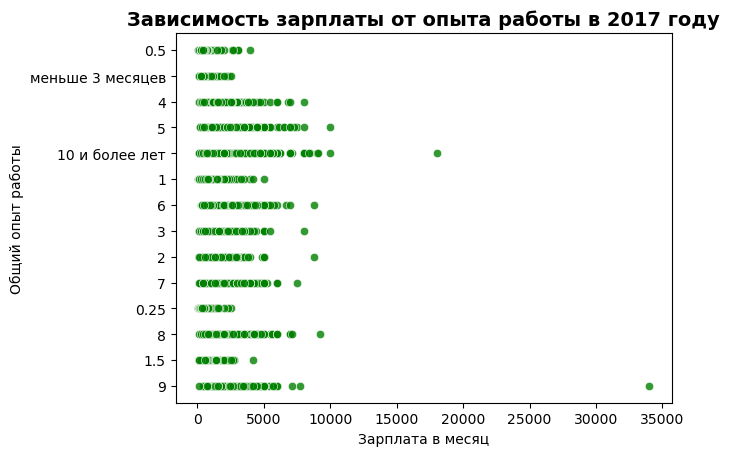

In [21]:
# Создание данных для графика
exp = data['Общий.опыт.работы']

# Оформление графика
sns.scatterplot(y=exp, x=salary, color='green', alpha=0.8)
plt.xlabel('Зарплата в месяц')
plt.ylabel('Общий опыт работы')
plt.title('Зависимость зарплаты от опыта работы в 2017 году', fontsize=14, fontweight='bold')
plt.show()
